In [ ]:
# !pip install kneed

In [ ]:
# link to an original dataset
url = 'https://archive.ics.uci.edu/dataset/222/bank+marketing'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No blanks

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


No unusual values

In [ ]:
print(df.shape)
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))

(41188, 21)
y
no     36548
yes     4640
Name: count, dtype: int64
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


Disbalance - most of the clients did not click the add

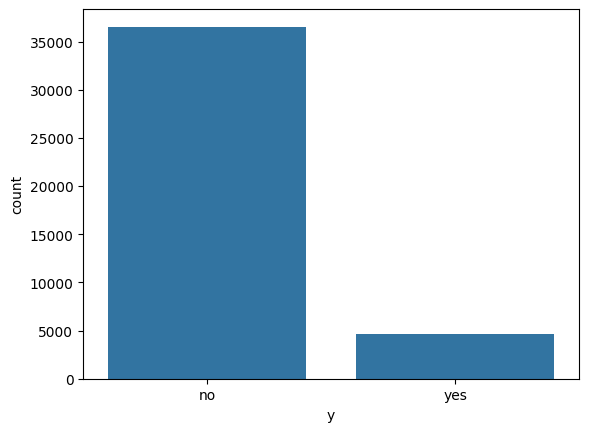

In [ ]:
sns.countplot(data=df, x='y')
plt.show()

In [ ]:
# --- Columns ---
# numerical columns to use for scaling and analysis (exclude 'duration' for modelling/clustering to avoid leakage)
num_cols = ["age", "campaign", "pdays", "previous",
            "emp.var.rate", "cons.price.idx", "cons.conf.idx",
            "euribor3m", "nr.employed"]

leakage_cols = ["duration"]  # keep separately, don't use in X

# categorical columns to encode
cat_cols = ["job", "marital", "education", "default", "housing", "loan",
            "contact", "month", "day_of_week", "poutcome"]

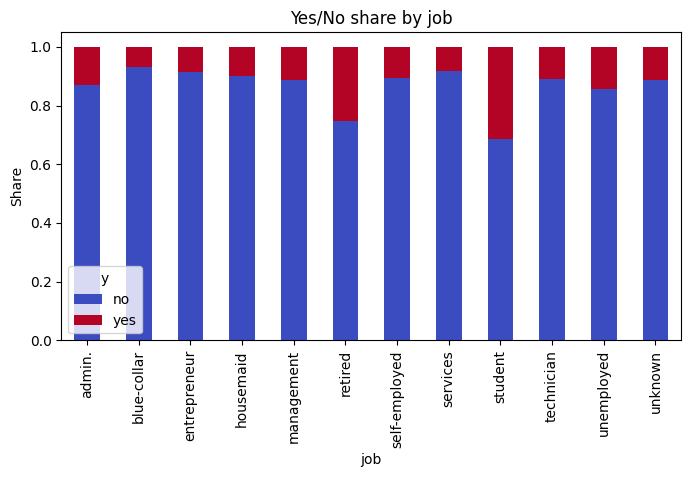

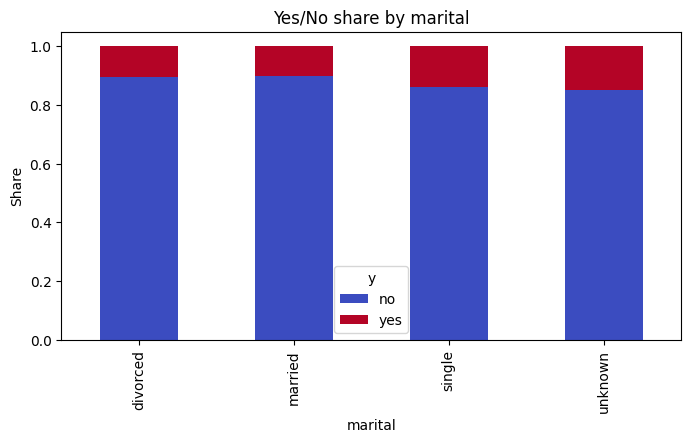

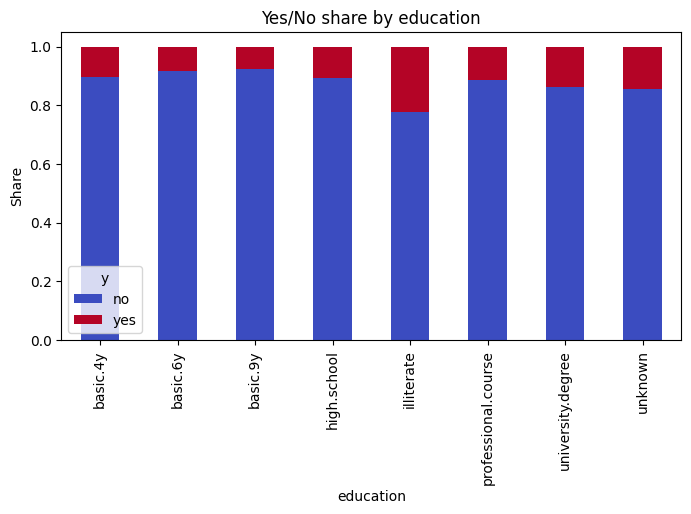

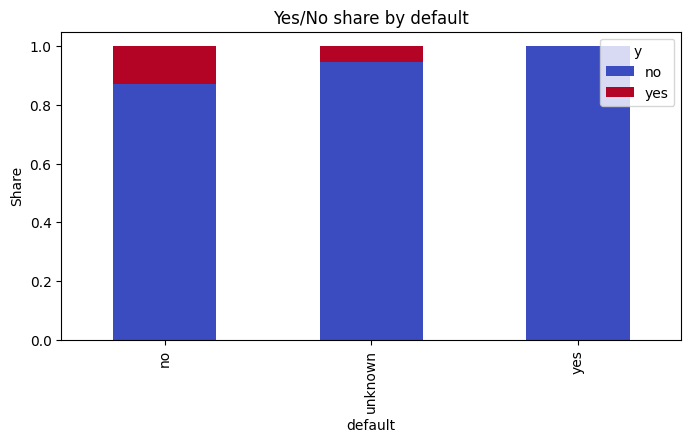

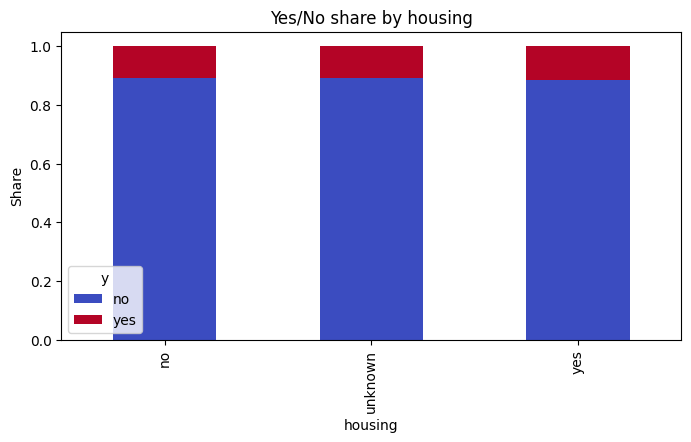

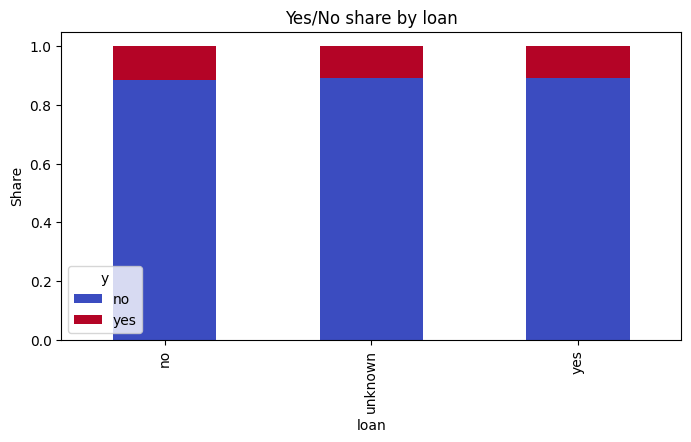

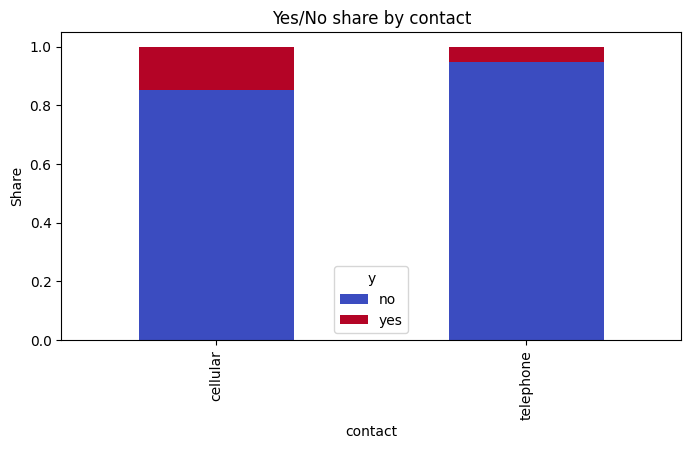

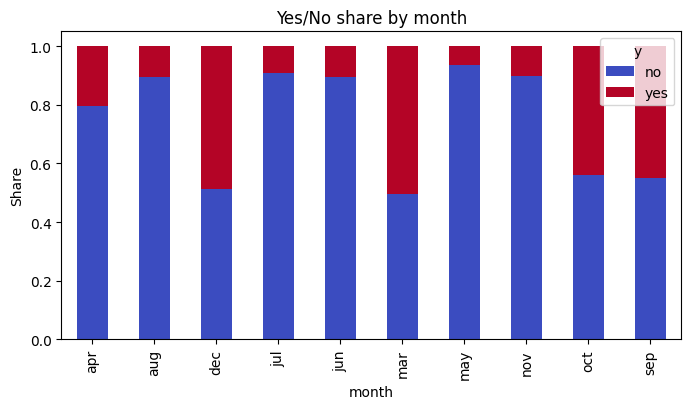

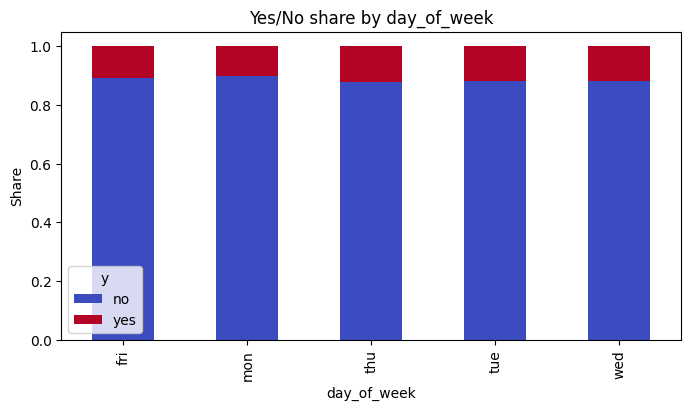

In [ ]:
for col in cat_cols[:-1]: # except 'y'
  prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
  prop_df.plot(kind="bar", stacked=True, figsize=(8, 4), colormap='coolwarm')
  plt.title(f"Yes/No share by {col}")
  plt.ylabel('Share')
  plt.show()

Generally, a significant majority of people answer 'no' (the blue bars are much higher than the red ones) on all charts. This indicates that the product or service has a low conversion rate.

The most important variables that influence the chance of a positive response are the contact method (cellular vs. telephone) and the campaign month. Less significant, but still noticeable, are job and education. Marital status, loan and housing ownership, and credit history have a negligible or very low impact on the outcome.

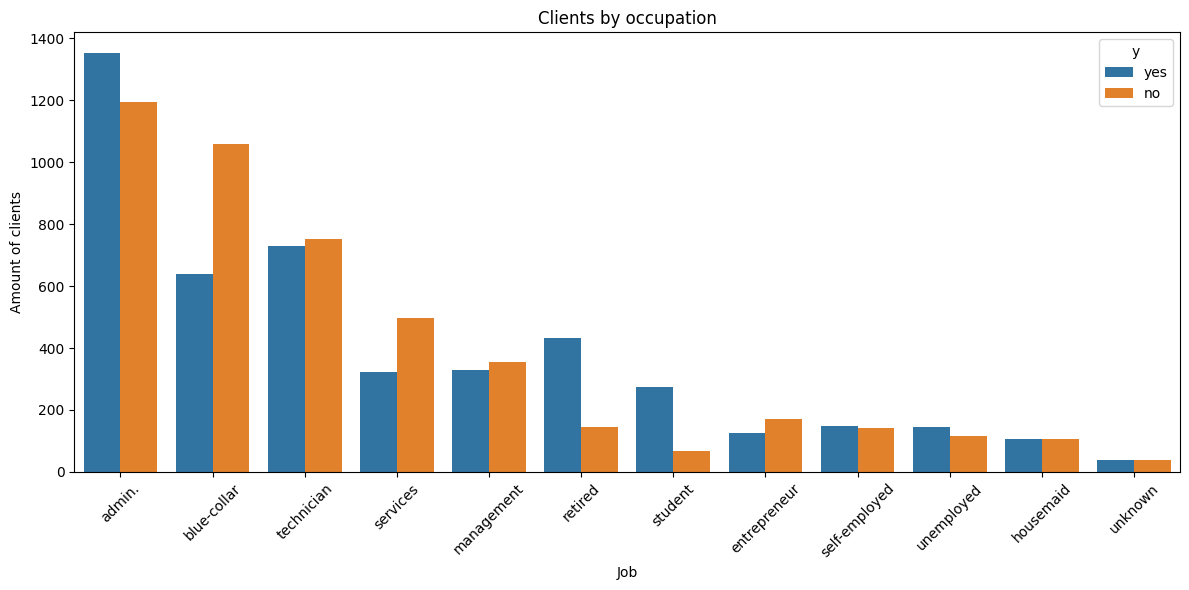

In [ ]:
yes_df = df[df["y"]=="yes"]
no_df = df[df["y"]=="no"].sample(len(yes_df), random_state=42)
balanced_df = pd.concat([yes_df, no_df])
plt.figure(figsize=(12,6))
sns.countplot(data=balanced_df, x="job", hue="y", order=balanced_df["job"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Job")
plt.ylabel("Amount of clients")
plt.title("Clients by occupation")
plt.tight_layout()
plt.show()

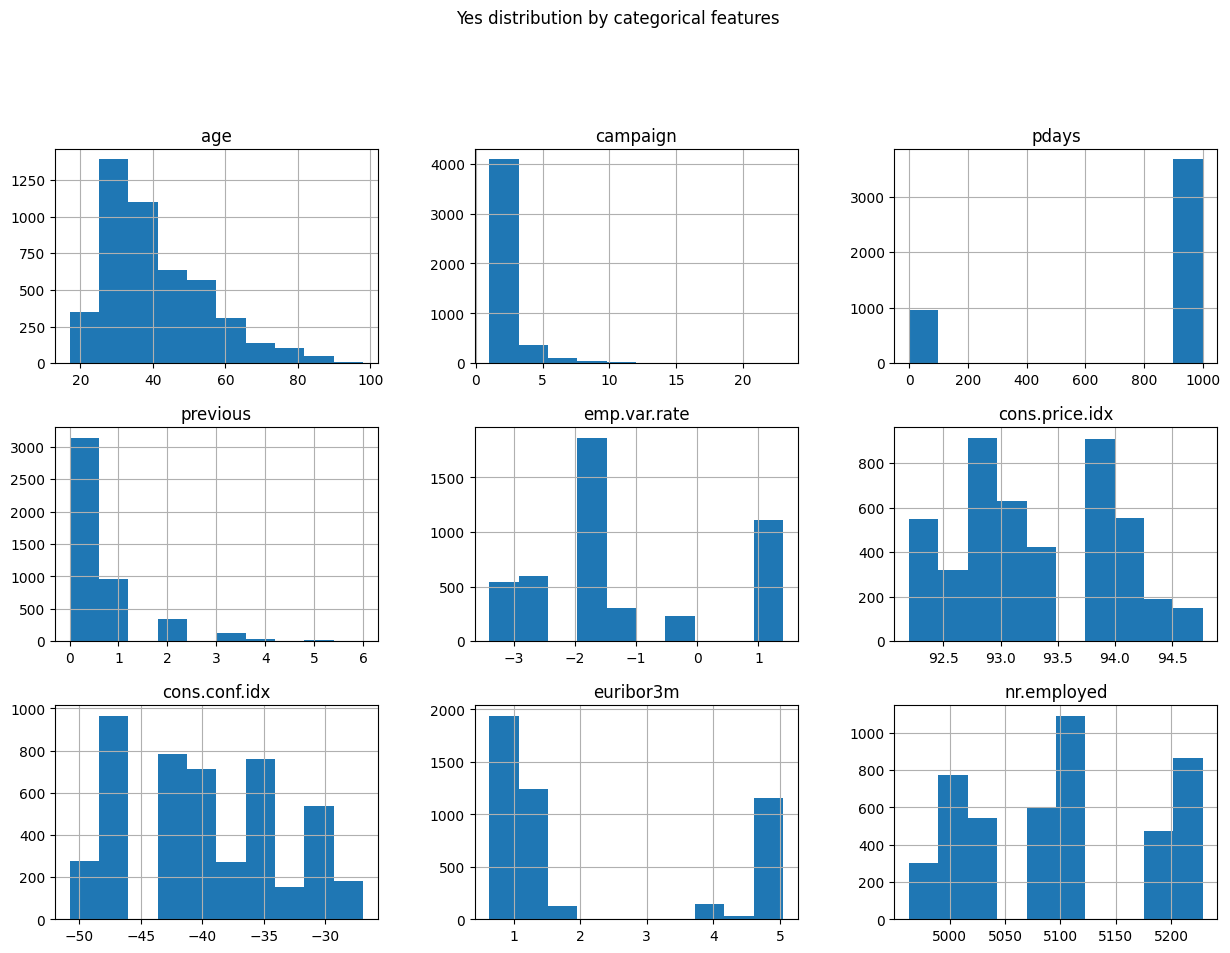

In [ ]:
yes_df[num_cols].hist(figsize=(15,10))
plt.suptitle("Yes distribution by categorical features", y=1.02)
plt.show()

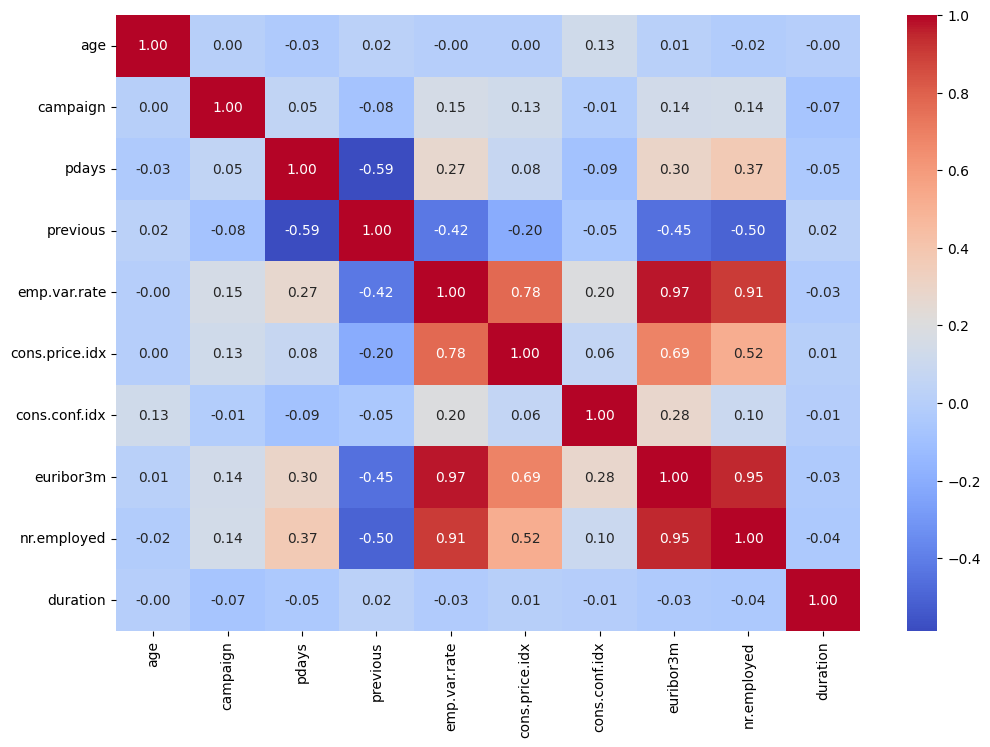

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ["duration"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The strongest correlations occur among economic variables such as 'emp.var.rate', 'euribor3m', and 'nr.employed', which is intuitive. These variables are so strongly related that in some statistical models, they might represent the same underlying trend.

In contrast, variables like age or duration of contact show very weak relationships with other variables in the dataset. This means they have unique characteristics that are independent of the other variables.

In [ ]:
# --- Map simple binary/unknown columns ---
df["default"] = df["default"].map({"yes": 1, "no": 0, "unknown": 2})
df["housing"] = df["housing"].map({"yes": 1, "no": 0, "unknown": 2})
df["loan"] = df["loan"].map({"yes": 1, "no": 0, "unknown": 2})

In [ ]:
# --- One-hot encode categorical variables (excluding target 'y') ---
df_encoded = pd.get_dummies(df, columns=[c for c in cat_cols if c in df.columns], drop_first=False)

In [ ]:
# --- Standardize only numerical columns (not one-hot) ---
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
# --- Build feature matrix X for clustering/modeling ---
# Exclude the target 'y' and leakage columns (duration) and any columns created later
exclude_cols = ["y"] + leakage_cols
X = df_encoded.drop(columns=[c for c in exclude_cols if c in df_encoded.columns]).copy()

# Ensure X doesn't accidentally include target-like columns
if 'y_num' in X.columns:
    X = X.drop(columns=['y_num'])

In [ ]:
# --- Determine optimal K using elbow (inertia) method with KneeLocator ---
inertia = []
K = list(range(1, 11))
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

kneedle = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print("Optimal k (elbow):", optimal_k)

Optimal k (elbow): 3


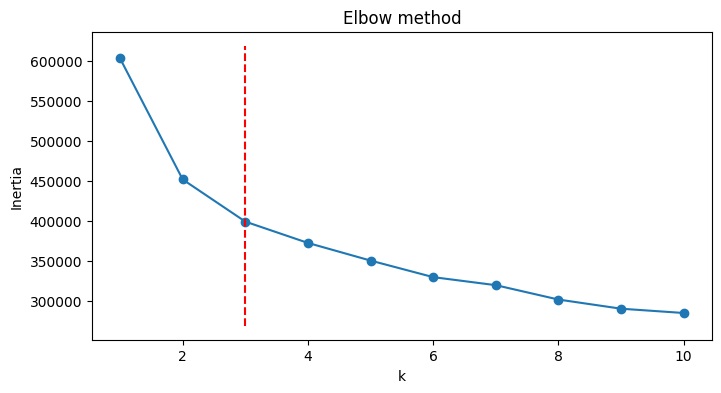

In [ ]:
# Plot inertia
plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

In [ ]:
# --- KMeans ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded["cluster"] = kmeans.fit_predict(X)

print(df_encoded["cluster"].value_counts())

cluster
1    27645
0    12006
2     1537
Name: count, dtype: int64


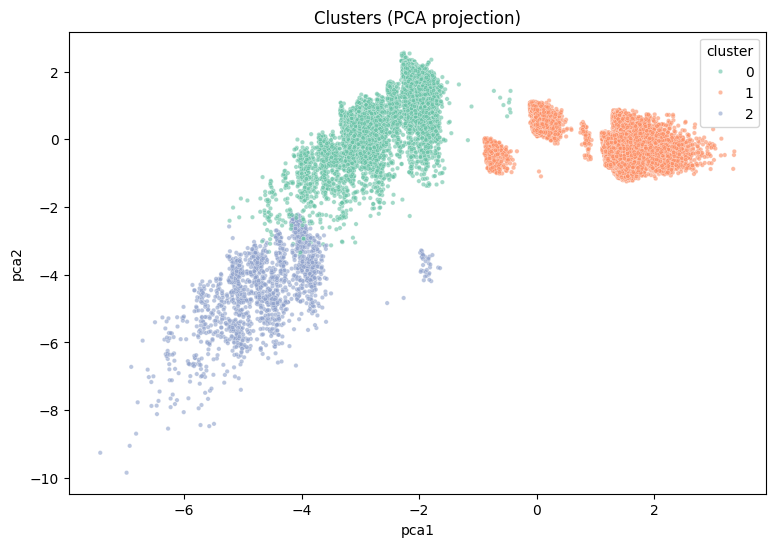

In [ ]:
# --- PCA for visualization (use same X) ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
df_encoded["pca1"] = X_pca[:, 0]
df_encoded["pca2"] = X_pca[:, 1]

plt.figure(figsize=(9,6))
sns.scatterplot(data=df_encoded, x="pca1", y="pca2", hue="cluster", palette="Set2", alpha=0.6, s=10)
plt.title("Clusters (PCA projection)")
plt.show()

In [ ]:
# --- Cluster summaries (numerical features) ---
cluster_summary_scaled = df_encoded.groupby("cluster")[num_cols].mean()
cluster_summary_real = pd.DataFrame(scaler.inverse_transform(cluster_summary_scaled), columns=num_cols, index=cluster_summary_scaled.index)
print("Cluster means (real scale):")
print(cluster_summary_real)

Cluster means (real scale):
               age  campaign       pdays  previous  emp.var.rate  \
cluster                                                            
0        39.391054  2.124938  999.000000  0.318591     -2.025287   
1        40.192838  2.800940  999.000000  0.025249      1.117819   
2        41.932986  1.828237   20.227716  1.692258     -2.090956   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
cluster                                                         
0             92.986952     -43.188439   1.202265  5077.949559  
1             93.843861     -39.456763   4.818496  5213.419671  
2             93.350417     -38.333442   0.983730  5028.644047  


In [ ]:
# --- Subscription rate by cluster ---
df_encoded["y_num"] = df_encoded["y"].map({"yes": 1, "no": 0})
cluster_subscribe_rate = df_encoded.groupby("cluster")["y_num"].mean() * 100
print("Subscription rate (%) by cluster:")
print(cluster_subscribe_rate)

Subscription rate (%) by cluster:
cluster
0    19.448609
1     4.829083
2    63.109954
Name: y_num, dtype: float64


class 2 has the most amount of clients who subscribed

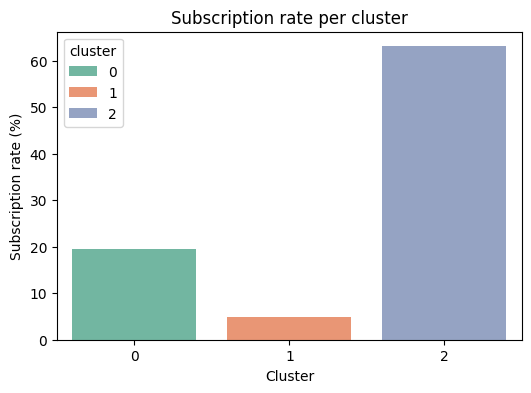

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_subscribe_rate.index, y=cluster_subscribe_rate.values, hue=cluster_subscribe_rate.index, palette="Set2")
plt.ylabel("Subscription rate (%)")
plt.xlabel("Cluster")
plt.title("Subscription rate per cluster")
plt.show()

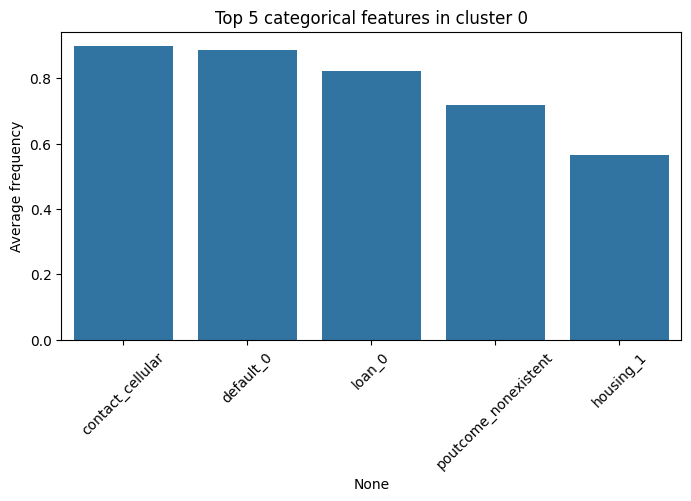

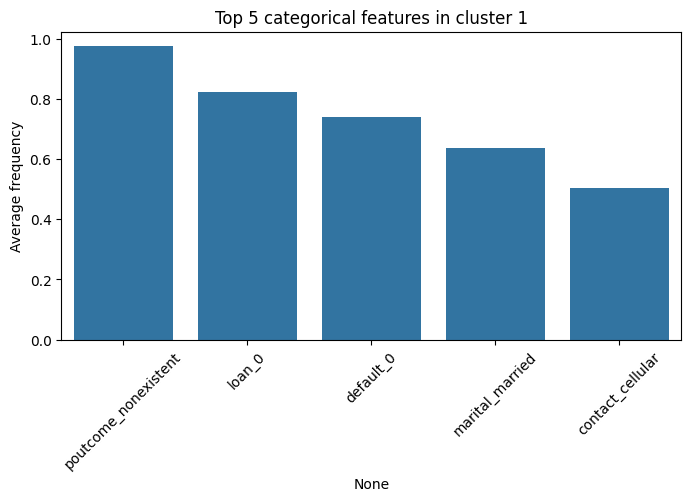

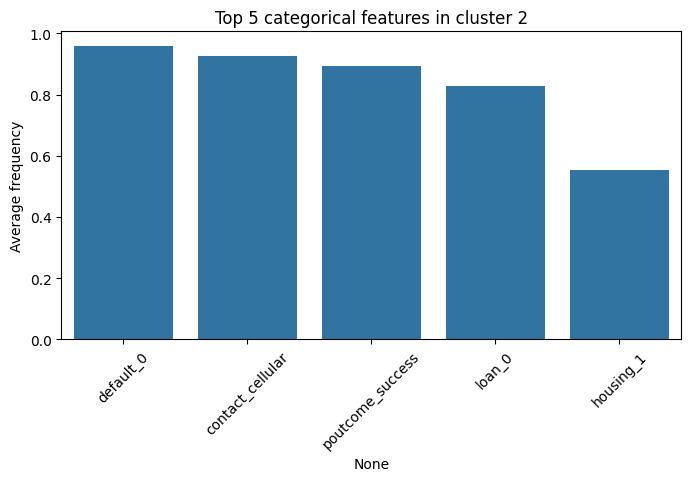

In [ ]:
# --- Top categorical features per cluster (one-hot columns) ---
one_hot_cols = [c for c in df_encoded.columns if any(c.startswith(prefix + "_") for prefix in cat_cols)]
cluster_cat_summary = df_encoded.groupby("cluster")[one_hot_cols].mean()

for cluster_id in sorted(df_encoded["cluster"].unique()):
    top5 = cluster_cat_summary.loc[cluster_id].sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top5.index, y=top5.values)
    plt.xticks(rotation=45)
    plt.title(f"Top 5 categorical features in cluster {cluster_id}")
    plt.ylabel("Average frequency")
    plt.show()

Cluster 2 is the 'potential success' group, consisting of people who previously responded positively to campaigns and were mainly contacted via mobile phone. They are ideal candidates for re-engagement.

Cluster 0 is the 'new contacts' group, with similar credit characteristics to Cluster 2, but without a history of successful previous contact.

Cluster 1 is a group with unique characteristics, dominated by people with no history of prior conversion, often married, without personal loans, and less frequently contacted via mobile phone.

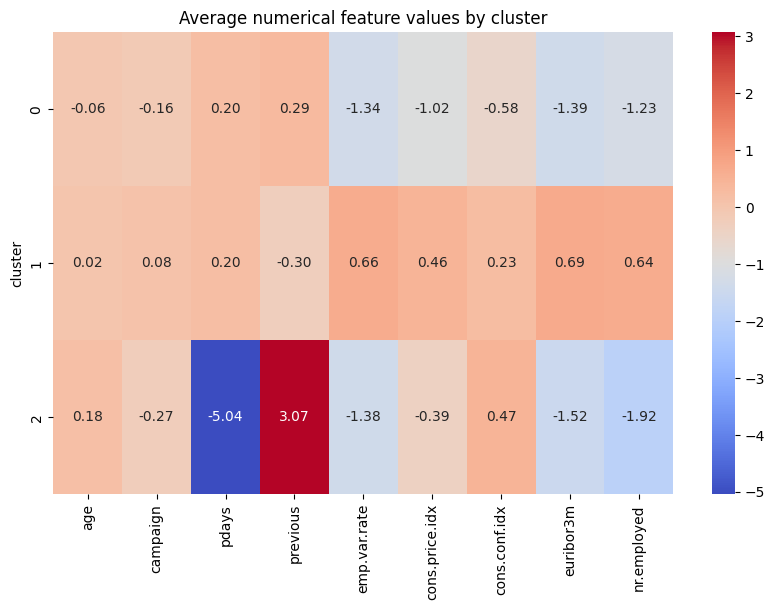

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary_scaled, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average numerical feature values by cluster")
plt.show()

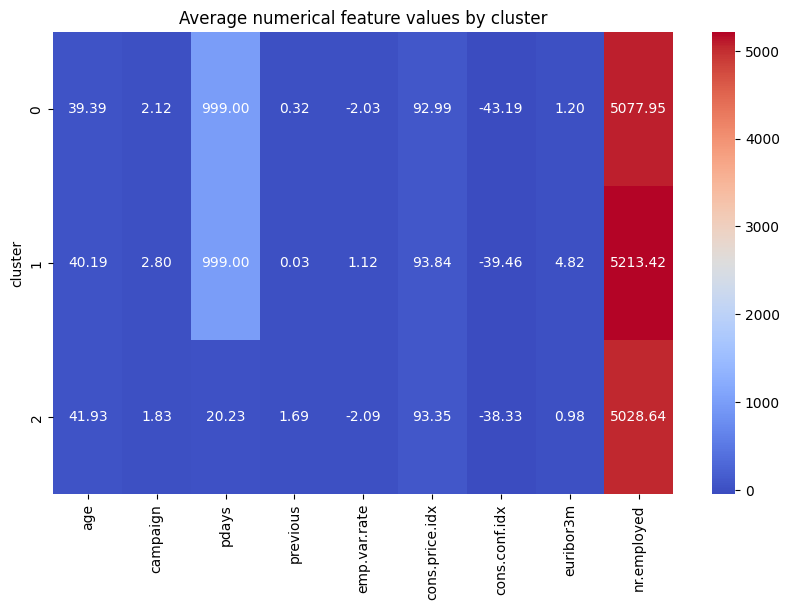

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary_real, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average numerical feature values by cluster")
plt.show()

Cluster 2 stands out from the rest. It consists of older clients with whom the company had frequent, successful contact in the past, which occurred during favorable economic conditions.

Clusters 1 and 0 are very similar in many respects. Both are primarily composed of new clients with no prior contact. The main difference is the economic conditions at the time of contact, which were worse for Cluster 1 than for Cluster 0.

1) Data prep - copy the dataset, set the binary target, mark clusters as categorical.
2) Simulate experiment - randomly assign treatment (0/1) to mimic an A/B test.
3) Logistic regression - fit a model with treatment, cluster, and their interaction, so treatment effects can differ by cluster.
4) Predictions - compute predicted probabilities (p_hat) for each observation.
5) Policy evaluation - compare two strategies:

-Policy A: apply treatment to everyone (average predicted response).

-Policy B: apply treatment only to the “warmest” cluster (highest observed conversion).

In [ ]:
# --- A/B simulation (note: treatment is artificial here) ---
# Prepare data for modeling: avoid using leakage cols
model_df = df_encoded.copy()
model_df['y_bin'] = model_df['y_num']  # binary target

# Make cluster categorical
model_df['cluster'] = model_df['cluster'].astype('category')

# Random treatment assignment for simulation purpose (in real experiment treatment is assigned by design)
np.random.seed(42)
model_df['treatment'] = np.random.choice([0, 1], size=len(model_df))

# Logistic regression with interaction
# Note: formula uses categorical cluster automatically (statsmodels treats 'cluster' as categorical dtype)
model = smf.logit("y_bin ~ treatment + cluster + treatment:cluster", data=model_df).fit(disp=False)
print(model.summary())

# Predict response probabilities
model_df['p_hat'] = model.predict(model_df)

# Policy evaluation: average predicted response
policy_A_avg = model_df['p_hat'].mean()
# choose the warmest cluster (highest subscribe rate) programmatically
warm_cluster = cluster_subscribe_rate.idxmax()
policy_B_avg = model_df.loc[model_df['cluster'] == warm_cluster, 'p_hat'].mean()

print(f"Average predicted response — Policy A (all): {policy_A_avg:.4f}")
print(f"Average predicted response — Policy B (only cluster {warm_cluster}): {policy_B_avg:.4f}")

                           Logit Regression Results                           
Dep. Variable:                  y_bin   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41182
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                  0.1536
Time:                        18:18:21   Log-Likelihood:                -12273.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.3901      0.032    -42.834      0.000      -1.454      -1.326
cluster[T.1]              -1.6169      0.052    -31.305      0.000      -1.718      -1.516
clus

In [ ]:
summary = {
    "optimal_k": optimal_k,
    "cluster_counts": df_encoded["cluster"].value_counts().to_dict(),
    "cluster_subscribe_rate": cluster_subscribe_rate.to_dict(),
    "policy_A_avg": policy_A_avg,
    "policy_B_avg": policy_B_avg,
    "warm_cluster": int(warm_cluster)
}
print(summary)

{'optimal_k': np.int64(3), 'cluster_counts': {1: 27645, 0: 12006, 2: 1537}, 'cluster_subscribe_rate': {0: 19.448609028818925, 1: 4.829083016820402, 2: 63.109954456733895}, 'policy_A_avg': np.float64(0.11265417111780143), 'policy_B_avg': np.float64(0.6310995445673386), 'warm_cluster': 2}


Cluster 2 are the “warm” users who respond much more frequently.

Their average response probability is much higher than that of the other clusters.

Policy B is much more effective than Policy A.

If the ad is shown to everyone, a large part of the budget is spent on users with a low probability of responding (clusters 0 and 1).

If we target only cluster 2, we use resources most efficiently on those who are likely to respond.

Recommendation: target only cluster 2.